# Assignment 2


#### 1. 复习上课内容以及复现课程代码

在本部分，你需要在复习上课内容和课程代码后，复现课程代码。 

##### Build Graph

In [1]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'格尔木', geoCoord:[94.9, 36.41]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
{name:'拉萨', geoCoord:[91.11, 29.97]},
{name:'那曲', geoCoord:[92.1, 31.47]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
//{name:'吐鲁番', geoCoord:[89.17, 42.95]},
{name:'哈密', geoCoord:[93.44, 42.78]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [2]:
import re

In [3]:
def get_city_info(city_coordination):
    city_geoCoord={}#定义city_geoCoord为字典，():元组tuple, []:列表list, {}字典dict
    for line in city_coordination.split("\n"):
        if line.startswith("//"):continue  # 如果line的前缀为 // 则跳出本次循环
        line=line.replace(' ','')          # 去除字符串中的空格
        if line=="":continue              # 去除空格后若为空，跳出本次循环

        city_name = re.findall("name:'(\w+)'",line)[0]                # [0]为了在获取到多个值时变成列表的情况下，从列表里选取第一值
        x=re.findall("geoCoord:\[(\d+.\d+),\S",line)[0]               #  提取经度x
        y=re.findall(",(\d+.\d+)]}",line)[0]                          #  提取纬度y
        #x_y=re.findall("geoCoord:\[(\d+.\d+),(\d+.\d+)\]}",line)[0]  # \[表示字符[,不加\就当括号用了
        #x_y=tuple(map(float,x_y))                                    # x_y=(x,y)
                                                                      # Python 3.x  tuple(map(float,x_y))=(float(x),float(y))  ,
                                                                      # Python 2.x  map(float,x_y)=[float(x),float(y)]  ,是个list
        city_geoCoord[city_name]=(float(x),float(y))
    return city_geoCoord                                              # city_geoCoord={key=城市名：(经度，维度)}

In [4]:
city_info=get_city_info(coordination_source)

In [5]:
from math import*
def Distance(Lat_A,Lng_A,Lat_B,Lng_B): #LNG代表经度，LAT代表纬度
    ra=6378.140 #赤道半径
    rb=6356.755 #极半径 （km）
    flatten=(ra-rb)/ra  #地球偏率
    rad_lat_A=radians(Lat_A)
    rad_lng_A=radians(Lng_A)
    rad_lat_B=radians(Lat_B)
    rad_lng_B=radians(Lng_B)
    pA=atan(rb/ra*tan(rad_lat_A))
    pB=atan(rb/ra*tan(rad_lat_B))
    xx=acos(sin(pA)*sin(pB)+cos(pA)*cos(pB)*cos(rad_lng_A-rad_lng_B))
    c1=(sin(xx)-xx)*(sin(pA)+sin(pB))**2/cos(xx/2)**2
    c2=(sin(xx)+xx)*(sin(pA)-sin(pB))**2/sin(xx/2)**2
    dr=flatten/8*(c1-c2)
    distance=ra*(xx+dr)
    return distance

In [6]:
def get_city_distance(city1,city2):
    if city1 == city2:
        return 0
    return Distance(city_info[city1][1],city_info[city1][0],city_info[city2][1],city_info[city2][0])

In [7]:
get_city_distance("北京","上海")

1066.6740273466355

##### 画图库

In [8]:
import networkx as nx             #加载networkx库，简称为nx
import matplotlib.pyplot as plt   #加载matplotlib.pyplo库，简称为plt
print(nx,'\n',plt)
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK JP'] # 系统里就是这个中文字体

<module 'networkx' from '/home/g/anaconda3/lib/python3.7/site-packages/networkx/__init__.py'> 
 <module 'matplotlib.pyplot' from '/home/g/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>


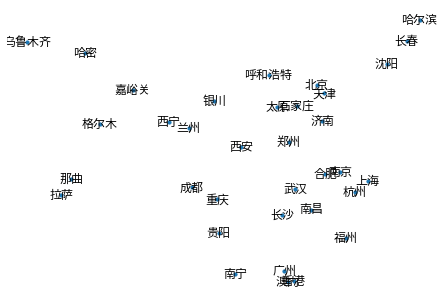

In [9]:
city_graph = nx.Graph()
city_graph.add_nodes_from(list(city_info.keys())) #输入是list
nx.draw(city_graph, city_info, with_labels=True, node_size=10)

In [10]:
from collections import defaultdict
def build_connection(city_info):
    city_connection=defaultdict(list) #直接设置为字典的话，字典里的key不存在会有keyError
    for start in city_info.keys():
        for destination in city_info.keys():
            if start==destination:continue
            if get_city_distance(start,destination)>700:continue
            city_connection[start].append(destination)
    return city_connection

In [11]:
city_connection=build_connection(city_info)
print(city_connection['兰州'][0])

嘉峪关


In [12]:
city_connection_graph=nx.Graph(city_connection)

/home/g/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


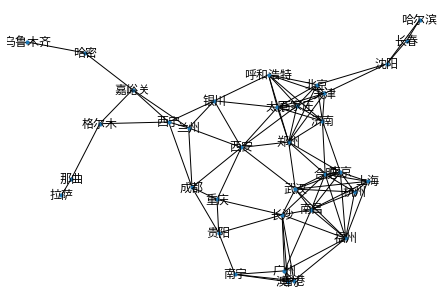

In [13]:
nx.draw(city_connection_graph,city_info,with_labels=True,node_size=10)

##### BFS

In [14]:
def bfs(graph,start,destination):
    paths=[[start]]                                              # pathes is like [[A,B,...,F],[A,C,...,G],[A,C,...,H],[A,D,...,K],[A,D,...,L]]
    visited=set()                                                # set()表示无序集合
    new_paths=[]
    optimal_paths=[]
    if start==destination:optimal_paths=paths                              # if start=destination optimal_paths is start point it self

    while paths:

        if optimal_paths:return optimal_paths

        for path in paths:  # path is like [A,B,...,F]
            point=path[-1]   # point is like F 
            #if point in visited:continue
            for new_point in graph[point]:
                if new_point in visited:continue                # if new_point is in visited，jump out
                #if new_point in path:continue                  # new_point在path里则肯定会在visited里,后面visited验证也可以把他检查出来，重复了                
                new_path=path+[new_point]                       # add new_point after point in path as new_path,it's like [A,B,...,F,G]
                if new_point==destination:optimal_paths.append(new_path)
                else:new_paths.append(new_path)                 # add new_path in new_pathes for new layer,it's like [[A,B,...,F,G],[A,C,...,G,H],[A,C,...,H,L],[A,D,...,K,J],[A,D,...,L,P]]
                visited.add(point)

        paths=[]                                               # clean paths
        paths.extend(new_paths)                                # new_paths will be next layer's paths 
        new_paths=[]                                           # clean new_paths and go to next layer
        
    return optimal_paths

In [15]:
bfs(city_connection,'拉萨','南京')

[['拉萨', '那曲', '格尔木', '嘉峪关', '兰州', '西安', '武汉', '南京'],
 ['拉萨', '那曲', '格尔木', '嘉峪关', '兰州', '西安', '郑州', '南京'],
 ['拉萨', '那曲', '格尔木', '西宁', '兰州', '西安', '武汉', '南京'],
 ['拉萨', '那曲', '格尔木', '西宁', '兰州', '西安', '郑州', '南京'],
 ['拉萨', '那曲', '格尔木', '西宁', '成都', '西安', '武汉', '南京'],
 ['拉萨', '那曲', '格尔木', '西宁', '成都', '西安', '郑州', '南京'],
 ['拉萨', '那曲', '格尔木', '西宁', '银川', '太原', '郑州', '南京'],
 ['拉萨', '那曲', '格尔木', '西宁', '银川', '太原', '济南', '南京'],
 ['拉萨', '那曲', '格尔木', '西宁', '银川', '西安', '武汉', '南京'],
 ['拉萨', '那曲', '格尔木', '西宁', '银川', '西安', '郑州', '南京'],
 ['拉萨', '那曲', '格尔木', '西宁', '银川', '呼和浩特', '郑州', '南京'],
 ['拉萨', '那曲', '格尔木', '西宁', '银川', '呼和浩特', '济南', '南京']]

#### 2. 回答以下理论题目

###       < 评阅点 >： 答案是否正确完整

###### 2.1 What conditions are required to make the BFS return the optimal solution ?

###### 使用BFS算法返回最佳路径需要什么条件？

答：任意两个相连节点间的cost是一样且非负的

##### 2.2 Is there a way to make DFS find the optimal solution ? (You may need to read some material about iterative DFS)

###### 有什么办法使得用DFS也能找到最佳路径？

答：用DFS遍历所有路径，然后对比各个路径，返回最佳的那个

##### 2.3 In what conditions BFS is a better choice than DFS and vice versa ?

###### 什么情况下选择BFS比DFS要好，反过来呢？

 答 ：需要寻找最佳路径的时候选择BFS；只需要找到一个路径就好，又需要节省内存的时候选择DFS

##### 2.4 When can we use machine learning ?

##### 什么情况下我们能用到机器学习？

答：需要从大量有序或无序的数据中，寻找一定规律的时候。

##### 2.5 What is the gradient of a function ?

##### 什么是函数的梯度？

答：由函数的偏导数组成的向量

##### 2.6 How can we find the maximum value of a function using the information of gradient ?

##### 我们怎么利用梯度信息来求解函数的最大值（极大值）？

答：沿梯度上升方向迭代搜索

#### 3. 实践部分  寻找地铁路线

### < 评阅点 >  1: 爬虫爬取数据是否完整;  2:搜索算法是否正确

In this part, although we recommend you to use Beijing subway, you still can use the subway map of any cities that you are interested in. 

![title](img/ditu.png)

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system.

Deadline: 2019-October-27

#### Procedures

#### 1. Get data from web.  

Some tips: 

a. You might need this package: requests[https://2.python-requests.org/en/master/] to get webpages

b.You might need to use Regular Expression and Beautiful Soap package to parse the webpages

In [16]:
def get_metro_map():
    # 加载requests和etree库
    import requests
    from lxml  import etree
    # 去除警告
    from requests.packages.urllib3.exceptions import InsecureRequestWarning
    requests.packages.urllib3.disable_warnings(InsecureRequestWarning)
    
    response = requests.get('https://map.bjsubway.com/subwaymap/beijing.xml?v=2',verify=False)  #从网上加载https://map.bjsubway.com/subwaymap/beijing.xml
    response.encoding = "utf-8"                          # 设置response的编码为utf-8，否则容易出现乱码
    metro_map=defaultdict(list)
    xml = etree.XML(response.content)

    for line in xml.xpath('//l'):
        Metro_Line=line.xpath('@lid')[0]                #获取线路名
        loop=line.xpath('@loop')[0]                     #是否环线
        for point in line:
            if point.xpath('@lb'):                      # 避开空值
                station=point.xpath('@lb')[0].strip()   # 获取站点名（并去除空格）
                if len(station) ==0:continue            # 避开空值
                metro_map[(Metro_Line,loop)].append(station)    # 把站点赋值给线路，同时保持顺序
    return metro_map

In [17]:
metro_map=get_metro_map()

##### 2. Preprocessing data

Some tips:

a. Find a suitable way to save the data you get from the web. (Note: The way you use to save the data should be able to be used to create the graph that your agent is going to explore)

In [18]:
# metro_map is like {lineA:[station1,station2,station3......],lineB:[station4,station5,station6......],...}
def make_connection_between_stations(metro_map):
    connection_between_stations=defaultdict(list)

    for l in metro_map.keys():
        
        line=metro_map[l]
        loop=l[1]
        for station in line:
            
            previous_station=''
            next_station=''
            index=line.index(station)
            if loop=="false":                                        #检查是否是环线
                if index > 0: previous_station=line[index-1]
                if index < len(line)-1:next_station=line[index+1]
            else:
                previous_station=line[index-1]
                if index < len(line)-1:next_station=line[index+1]
                else:next_station=line[0]
            if previous_station:connection_between_stations[station].append(previous_station)
            if next_station:connection_between_stations[station].append(next_station)
            connection_between_stations[station]=list(set(connection_between_stations[station])) #去重
    return connection_between_stations

In [19]:
connection_stations=make_connection_between_stations(metro_map)

###### 存在的问题：
       地铁2号线、地铁10号线是环线，没有正确获取站与站之间的联系！！
###### 解决：
       获取loop，检查是否是环线

#### 3. Build the search agent

Build the search agent based ont he graph you built.

for example, if you use Beijing subway graoh, and you run:

\>>> search("奥体中心“，”天安门“）

You should get the result as follows: 奥体中心 -> A ->B ->C ... -> 天安门

In [20]:
def search(s,d):
    path=bfs(connection_stations,s,d)                                    #bfs算法在复现课程代码部分
    more_paths=[]
    for L in path:
        paths=s
        for S in L:
            if S==s:continue
            paths=paths+"->"+S
        more_paths.append(paths)
    return more_paths

In [21]:
search("奥体中心","天安门西")

['奥体中心->北土城->安华桥->安德里北街->鼓楼大街->积水潭->西直门->车公庄->阜成门->复兴门->西单->天安门西']

In [22]:
def search2(s,d):
    path=bfs(connection_stations,s,d)                                    #bfs算法在复现课程代码部分
    paths=''
    for L in path:
        for S in L:
            if S==s:paths=paths+s
            else:paths=paths+"->"+S
        paths=paths+'\n'
    return print(paths)

In [23]:
search2("奥体中心","天安门西")

奥体中心->北土城->安华桥->安德里北街->鼓楼大街->积水潭->西直门->车公庄->阜成门->复兴门->西单->天安门西



### (Optional) Improve your agent to make it able to find a path based on different strategies

###  <评阅点> : 是否正确得到不同目标下的路径。

Some ideas you might want to try:

a. Find the shortest path between two stations.

b. Find the path that requires minimum transfers between two stations.

c. Combine the previous two ideas, find a more suitable path.

Compare your results with results obtained by using some apps such as Baidu map, A map, Google map or Apple map. If there is difference, try to explanate it.

###### a.
见上面search和search2

###### b.

In [35]:
#获取换乘站
def get_transfer_station(metro_map):# connection_stations is like {station1:[station2,station3,......],station6:[station4,station5,......],...}
    transfer_stations=[]
    transfer_stations_connection=defaultdict(list)
    
#    _connection_stations=make_connection_between_stations(metro_map)
#    for key in _connection_stations.keys():
#        if  len(_connection_stations[key])>2:transfer_stations.append(key)
    
#    for transfer_station in transfer_stations:
    for l in metro_map.keys():
        line=metro_map[l]
        for s_station in line:
            for d_station in line:
                if s_station==d_station:continue
                transfer_stations_connection[s_station].append(d_station)
    for key in transfer_stations_connection.keys():
        transfer_stations_connection[key]=list(set(transfer_stations_connection[key]))
    return transfer_stations_connection

In [36]:
transfer_stations_connection=get_transfer_station(metro_map)

In [37]:
def search_by_transfer_stations(s,d):
    path=bfs(transfer_stations_connection,s,d)                                    #bfs算法在复现课程代码部分
    more_paths=[]
    for L in path:
        paths=s
        for S in L:
            if S==s:continue
            paths=paths+"->"+S
        more_paths.append(paths)
    return more_paths

In [38]:
search_by_transfer_stations("奥体中心","天安门西")

['奥体中心->鼓楼大街->复兴门->天安门西',
 '奥体中心->鼓楼大街->建国门->天安门西',
 '奥体中心->北土城->国贸->天安门西',
 '奥体中心->北土城->公主坟->天安门西',
 '奥体中心->南锣鼓巷->苹果园->天安门西']

## Congratulations ! You have finished the assignment of week 2.

![title](img/agent.png)

### If you have any suggestions regarding the teaching, please feel free to send them to my eamil (eric.lee.xiao@gmail.com) 